# Задание 2

Промоделируйте выборку из $N(a,\sigma^2)$ (параметры $a$ и $\sigma^2$ могут быть любыми) объема $N = 150$. Посмотрите на выборочную медиану и выборочное среднее. 
Затем промоделируйте выборку из $N(a + 5\sigma, \sigma^2)$ объема $N = 5$ и добавьте эти наблюдения в исходную выборку.
* Повторите моделирование ($150$ наблюдений из одного распределения и $5$ из другого) несколько раз и исследуйте смещение среднего и медианы относительно $a$.
* Для любого ли распределения можно использовать выборочную медиану для оценки среднего?

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font="serif", font_scale=1.1)

Посмотрим на выборочную медиану и среднее для выборки из $N(a,\sigma^2)$ объема $N=150$:

In [17]:
a = 42
shift = 5
sigma = 1
n_big = 150
n_small = 5

ds = np.random.normal(a, sigma, 150)
print('Mean:', np.mean(ds))
print('Median:', np.median(ds))

Mean: 42.117798866322936
Median: 42.09660954869403


Добавим выборку из $N(a + 5\sigma, \sigma^2)$ объема $N = 5$ в исходную выборку:

In [22]:
ds_shifted = np.random.normal(a + shift * sigma, sigma, 5)
ds = np.concatenate((ds, ds_shifted))

print('Mean:', np.mean(ds))
print('Median:', np.median(ds))

Mean: 42.4349305183523
Median: 42.278513358233326


Повторим моделирование несколько раз и посмотрим на смещение среднего и медианы относительно $a$.

In [27]:
medians_shifts = []
mean_shifts = []

for _ in range(10):
    ds = np.random.normal(a, sigma, 150)
    ds_shifted = np.random.normal(a + shift * sigma, sigma, 5)
    ds = np.concatenate((ds, ds_shifted))
    
    medians_shifts.append(np.median(ds) - a)
    mean_shifts.append(np.mean(ds) - a)

Построим графики для смещений:

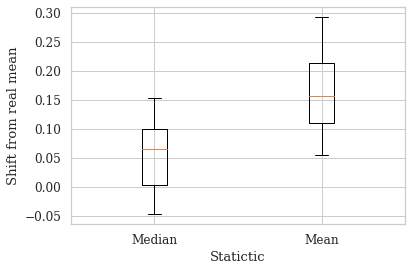

In [31]:
plt.boxplot([medians_shifts, mean_shifts])
plt.xticks([1, 2], ['Median', 'Mean'])


plt.xlabel('Statictic')
plt.ylabel('Shift from real mean')
plt.show()

### Вывод:
Медиана менее чувствительна к большим значениям на концах, чем среднее, так как учитывает только расположение "среднего" элемента, без каких-либо весов. А значит использовать медиану для оценки среднего можно среднего можно **не всега**, так как в некоторых случаях они могут не совпадать. Например, при наличии большого количества отдалённых outliers с одной из сторон выборки.